## 1. Problem Statement
**SyriaTel Customer Churn Prediction**

This project focuses on predicting customer churn for SyriaTel using supervised machine learning classification. 
Customer churn occurs when customers stop using a company’s services, which directly affects revenue. 
The goal is to build a model that can identify customers who are likely to churn so the company can take preventive action.


## 2. Business Understanding

Customer churn refers to customers leaving a service provider for a competitor or discontinuing the service altogether. 
Predicting churn helps SyriaTel identify at risk customers early and apply retention strategies such as targeted offers or improved customer support. 
A successful model allows the business to reduce revenue loss by focusing retention efforts on high risk customers.


## 3. Data Understanding

The dataset used in this project is the SyriaTel customer churn dataset obtained from the Learn curriculum GitHub repository. 
It contains customer account information, service usage details, and whether the customer churned or not. 
The target variable is `churn`, which indicates whether a customer left the company. 
Key features include call minutes, charges, international plan usage, and customer service call frequency.


## 4. Data Preparation

In this section, we will Load, inspect, clean and prepare the data for Machine Learning. We will also drop uneccessary columns that do not lead to any use with the Target Variable. We will also convert the Target variable `churn` to numerical formart so that the machine can learn from it

In [298]:
#IMPORT SECTION
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


In [299]:
data = pd.read_csv("..\data\Telecom.csv")
data

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [300]:
data.shape

(3333, 21)

In [301]:
data.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [302]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [303]:
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [304]:
#Dropping Unnecesary columns that don't help in Predicting
data = data.drop(columns=['phone number'])
data = data.drop(columns=['state'])

`Label Encoding the Target Variable`

In [305]:
#converting 'CHURN Column' to BINARY
data['churn'] = data['churn'].map({True: 1, False: 0})

`Checking the Class Balance of Churn coumn`

In [306]:
data.churn.value_counts()

churn
0    2850
1     483
Name: count, dtype: int64

`label encoding Features`

In [307]:
data['international plan'] = data['international plan'].map({'yes': 1, 'no': 0})
data['voice mail plan'] = data['voice mail plan'].map({'yes': 1, 'no': 0})

`Confirm All Columns are Numeric`

In [308]:
data.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


## 5. Exploratory Data Analysis

In this part we will understand how different features relate to customer churn

`A. Customer Service vs Churn`

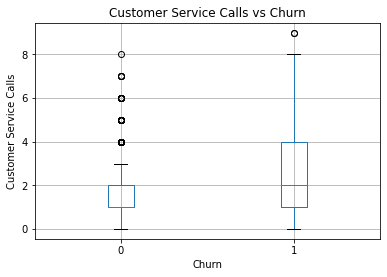

In [309]:
# Compare customer service calls by churn
data.groupby("churn")["customer service calls"].mean()

data.boxplot(column="customer service calls", by="churn")
plt.title("Customer Service Calls vs Churn")
plt.suptitle("")
plt.xlabel("Churn")
plt.ylabel("Customer Service Calls")
plt.show()


Customers who churn tend to make most customer service calls

`B. Distribution of Churn`

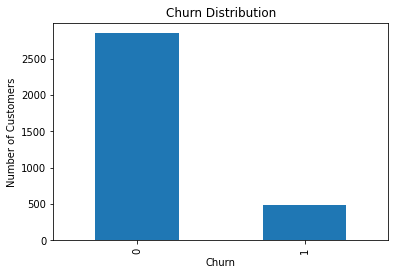

In [310]:
# distribution of churn
data["churn"].value_counts().plot(kind="bar")
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.show()


above we see that most customers do not `churn`, meaning that the class is imbalanced

`C. International Plan vs Churn`

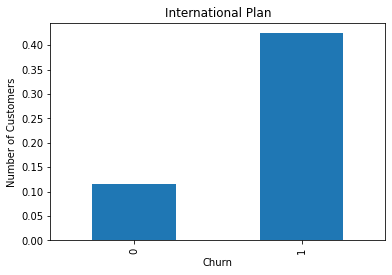

In [311]:
# Churn rate by international plan
data.groupby("international plan")["churn"].mean().plot(kind='bar')
plt.title("International Plan")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.show()

Customers with an International plan show a Higher `churn` rate

`D. Total Day Minutes vs Churn`

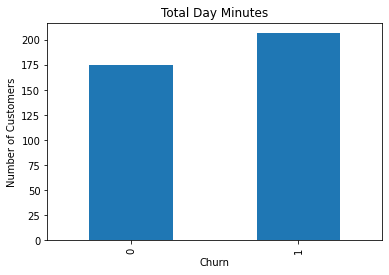

In [312]:
# Compare total day minutes by churn
data.groupby("churn")["total day minutes"].mean().plot(kind='bar')

plt.title("Total Day Minutes")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.show()


Usage Patterns of the the number of people who use this service, slightly differs between the customers who `churn` and who Do Not!

## 6. Feature Selection

In this part we will choose a Feature that Represents the Customer Behavior and a Target which Indicates whether the Customer `Churn`


In [313]:
X= data.drop('churn', axis=1)
y= data['churn']

# 7. Train Test Split

Here we will split the data into Training and Test data
Training data will be helpful to train the data and evaluate its perfomance on Unseen data. We will tackle `Data Leakage`

In [314]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Baseline Model 1: Logistic Regresssion

My choice of this model as first, Its easy to interpret and very simple and its very significant for `classification Problems like customer chun`

# 8.1 Training The Model

In [315]:
# Initialize the model
log_model = LogisticRegression(max_iter=1000)

# Train the model
log_model.fit(X_train, y_train)


c:\Users\Dennis\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

# 8.2 Predicting the Model

We will predict Our model on `Test Data`

In [316]:
y_pred_log = log_model.predict(X_test)
y_pred_log

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# 8.3 Confusion Matrix

On this Metric, I will check the perfomance here below

In [317]:
confusion_matrix(y_test, y_pred_log)

array([[556,  10],
       [ 87,  14]], dtype=int64)

Here we can Tell About the Positives and Negatives

TP  ||  FN

FP  ||  TN

`TP` - `TRUE POSITIVE` - (556)   |||  `FN` - `FALSE NEGATIVE` - (10)

`FP` - `FALSE POSITIVE` - (87)   |||  `TN` - `TRUE NEGATIVE` - (14)


# 8.4 Classification Report

Here I will Evaluate the Metrics for the perfomance of the Classifiers

In [318]:
# Precision, Recall, F1-score
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       566
           1       0.58      0.14      0.22       101

    accuracy                           0.85       667
   macro avg       0.72      0.56      0.57       667
weighted avg       0.82      0.85      0.81       667



Here Recall for Classifier `1` is highly looked upon

# 8.5 R0C - AUC

Here I will check the model Probability and Score

In [319]:
# Predict probabilities
y_prob_log = log_model.predict_proba(X_test)[:, 1]

# ROC AUC score
roc_auc_score(y_test, y_prob_log)

0.8294965538956722

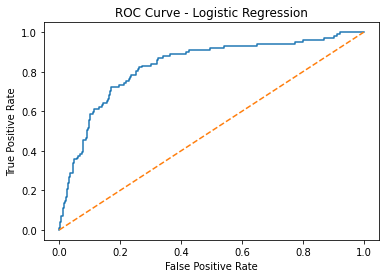

In [320]:
# Ploting ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_log)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.show()
